<center><h1>Mapping the emotional face. How individual face parts contribute to successful emotion recognition.</h1></center>

# 6. Representational Similarity Analysis (RSA)

We take the probability matrices of each picture and correlate them with each other. Then we can use the correlation coefficient as a similarity metric.  
To plot the ratings in a space where high similartiy means close proximity and high dissimilarty is translated to high distances, we need to compute a dissimilarty metric as 1-r. Then we can use MDS to plot the dissimilarities. We do this in a simple scatterplot and by plotting the images themselves instead of points representing them. The whole approach is adapted from [Kriegeskorte et al. 2008 Neuron](http://www.researchgate.net/profile/Nikolaus_Kriegeskorte/publication/23706598_Matching_Categorical_Object_Representations_in_Inferior_Temporal_Cortex_of_Man_and_Monkey/links/02bfe5143047817531000000.pdf); see also [Edelman 1998 BBS](http://homepage.psy.utexas.edu/HomePage/Faculty/Markman/PSY394/Edelman1998.pdf).

### Import modules

In [1]:
from myBasics import *
%matplotlib inline

from itertools import chain
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### get data

In [2]:
weightDf = pd.read_csv('../outputs/weightStdDf.csv',
                      index_col=[0,1,2])
weightDf.index.names = ['p','ident','emo']
weightDf = weightDf.sortlevel()

In [3]:
weightDf.head()

0         1         2         3         4         5  \
p    ident emo                                                               
p001 f     ang -0.948401 -0.006541  1.667878 -1.262355 -1.262355 -0.320494   
           dis -0.245679  1.036125 -0.074772 -1.100216 -1.100216  0.437950   
           fea  0.582234 -1.040508 -1.040508 -1.040508  0.401929 -1.040508   
           hap  0.352580  1.057741 -0.151106 -0.856267 -0.352580 -1.359953   
           ntr -0.897600 -0.897600  0.157930  0.733673  0.349844 -1.089514   

                       6         7         8         9        10        11  \
p    ident emo                                                               
p001 f     ang -0.948401  0.412064 -1.262355 -0.948401  1.039971  1.458576   
           dis  1.548847  0.865218 -0.245679 -1.100216  1.121579 -1.100216   
           fea  0.401929  1.844366  0.401929  0.582234  1.844366  0.582234   
           hap  1.460690 -0.453318 -1.359953  1.460690  0.755529 -0.352580   
           ntr -1.089514 -0.801643 -1.089514 -0.321856  1.213459 -0.321856   

                      12        13        14        15        16        17  \
p    ident emo                                                               
p001 f     ang -1.262355  0.098110  0.935320 -1.262355 -0.948401  0.412064   
           dis  0.865218  0.779764  0.608857 -1.100216  0.608857 -0.587494   
           fea  0.221624  0.582234  1.664062  0.582234  0.582234 -1.040508   
           hap  0.554055 -0.554055 -0.856267 -0.654792 -0.050369  0.151106   
           ntr  0.157930  0.733673  0.157930  0.157930 -0.897600 -0.609728   

                      18        19        20        21        22        23  \
p    ident emo                                                               
p001 f     ang -1.262355  0.412064  1.039971 -1.262355 -0.006541 -0.320494   
           dis -0.074772 -1.100216 -1.100216  1.805208  1.890662  0.437950   
           fea  0.221624  0.582234 -1.040508  1.123148  0.221624 -1.040508   
           hap -1.359953 -0.957004  0.251843  1.057741 -0.957004 -0.957004   
           ntr  0.733673 -1.089514 -1.089514 -0.513771  0.061972 -0.321856   

                      24        25        26        27        28        29  \
p    ident emo                                                               
p001 f     ang -0.320494 -0.843750  2.400437  0.412064  1.353925  0.412064   
           dis -0.672947  0.352496  0.096135 -1.100216 -0.074772 -1.100216   
           fea -1.040508 -1.040508  0.221624  0.401929  0.221624  2.024671   
           hap -0.453318  0.251843 -0.755529 -0.352580  0.050369  0.251843   
           ntr  0.445801 -0.033985  0.157930 -1.089514 -0.705685  0.445801   

                      30        31        32        33        34        35  \
p    ident emo                                                               
p001 f     ang  1.458576 -0.006541 -1.262355 -1.262355 -1.262355  0.412064   
           dis  3.257920 -0.587494  0.523404 -0.074772  1.292486  0.352496   
           fea -1.040508 -1.040508 -1.040508  0.401929  1.844366  0.582234   
           hap -0.755529 -1.259216  1.158478  0.151106  0.554055  1.762902   
           ntr  0.349844  2.077074  0.541758  1.981117  0.829630 -1.089514   

                      36        37        38        39        40        41  \
p    ident emo                                                               
p001 f     ang  1.039971  0.098110 -0.320494 -0.320494  0.098110  0.098110   
           dis -1.100216 -1.100216  1.463394 -0.074772 -1.100216 -0.587494   
           fea -1.040508 -1.040508 -1.040508 -1.040508 -1.040508  2.024671   
           hap -1.359953  1.762902 -0.352580  1.158478 -0.352580  2.065113   
           ntr -0.705685 -0.321856  0.829630 -1.089514  0.157930 -1.089514   

                      42        43        44        45        46        47  
p    ident emo                                                              
p001 f     ang  0.098110  1.353925 -1.26

### average

In [4]:
weightAvgDf = weightDf.groupby(level=[1,2]).mean()

In [5]:
weightAvgDf

0         1         2         3         4         5  \
ident emo                                                               
f     ang -0.107068 -0.090944  0.021346 -0.140837 -0.231097  0.120188   
      dis -0.197694  0.061481 -0.234455 -0.156955 -0.116681 -0.229027   
      fea  0.077753 -0.066480 -0.141368 -0.121815 -0.012927 -0.287902   
      hap -0.083151 -0.176273 -0.072354 -0.014752 -0.192790 -0.121763   
      ntr -0.123786 -0.018737  0.109495 -0.083957 -0.030939 -0.008957   
      sad  0.184882 -0.127680 -0.060984 -0.158955 -0.057357 -0.021647   
      sup -0.200397  0.061519 -0.204223 -0.190441  0.003277 -0.248203   
m     ang -0.147810 -0.090815  0.079869 -0.067013 -0.003200 -0.111989   
      dis -0.183420 -0.016911 -0.073400  0.024479 -0.234697 -0.063476   
      fea -0.077231 -0.200512 -0.074860 -0.140877 -0.066320 -0.126886   
      hap -0.050525 -0.290847 -0.085458 -0.092325 -0.189344 -0.080268   
      ntr -0.218679 -0.120495 -0.053487 -0.140802 -0.027873  0.054360   
      sad -0.076002 -0.054205 -0.080972 -0.177725 -0.033782 -0.041417   
      sup -0.054429 -0.149024  0.035815 -0.022497 -0.062488 -0.261285   

                  6         7         8         9        10        11  \
ident emo                                                               
f     ang -0.101582 -0.155755 -0.212338 -0.097965  0.484374  0.035292   
      dis -0.159949  0.004103 -0.161257 -0.209212 -0.077736 -0.004602   
      fea -0.147046 -0.017016 -0.061568  0.102944  0.736890 -0.114484   
      hap -0.207403 -0.184612 -0.123583 -0.118115  0.042775 -0.155732   
      ntr -0.170157 -0.192194 -0.176686  0.000314  0.661145 -0.199530   
      sad -0.145245 -0.084124 -0.059754 -0.122693  0.052222  0.053129   
      sup -0.105989 -0.133349  0.019298 -0.028401  0.351475  0.010811   
m     ang -0.116224 -0.349456 -0.063999 -0.086909  1.079562 -0.024076   
      dis -0.084005 -0.191738 -0.090126 -0.077726 -0.187415 -0.190714   
      fea  0.017264 -0.107285  0.007130 -0.091135  0.777351 -0.017429   
      hap -0.042586 -0.213514 -0.164511 -0.152753  0.223567  0.059805   
      ntr -0.109542 -0.004019 -0.036447 -0.032446  0.106896 -0.162269   
      sad -0.107863 -0.139478 -0.114452 -0.050734  0.111651  0.006293   
      sup -0.173190 -0.167149 -0.030314 -0.017201  0.637808 -0.175138   

                 12        13        14        15        16        17  \
ident emo                                                               
f     ang -0.089919  0.065455 -0.239384 -0.122578 -0.118693  0.146498   
      dis  0.010296  0.081108  0.119742 -0.017898 -0.184315 -0.036822   
      fea -0.240084  0.035541 -0.134807 -0.049666 -0.032427 -0.049715   
      hap  0.079402  0.812469  0.009954 -0.149744 -0.148304 -0.109140   
      ntr -0.004440  0.459792 -0.032845 -0.071983 -0.134917  0.030365   
      sad -0.223741  0.074674  0.087649 -0.172451 -0.018550  0.107360   
      sup -0.186709 -0.105716  0.171615 -0.190557 -0.199700 -0.049054   
m     ang -0.129015  0.049692 -0.293144 -0.141947 -0.157273 -0.137862   
      dis -0.026003 -0.206813  0.067961  0.172052 -0.076957 -0.304362   
      fea -0.177906  0.069966  0.113103  0.132541 -0.337640  0.021904   
      hap  0.176611  0.617089 -0.046032 -0.169695 -0.247911 -0.235120   
      ntr -0.088113  0.503841 -0.018245 -0.156115 -0.131595 -0.010068   
      sad  0.011445  0.023983 -0.055468 -0.047892 -0.107585  0.109009   
      sup -0.090473 -0.110422 -0.156938 -0.056181  0.116634  0.111349   

                 18        19        20        21        22        23  \
ident emo                                                               
f     ang  0.044670  0.344048  0.145883  0.255147  0.364067 -0.061439   
      dis -0.108139 -0.043717  0.015189  0.921797  1.060071 -0.102794   
      fea -0.082939 -0.058181 -0.169369  0.198205  0.376390 -0.238898   
      hap -0.002345 -0.099668 -0.000368  0.759900  0.242644 -0.197336   
      ntr  0.063706 -0.197195 -0.052643  0.393009  0.604447 -0.353003   


### Transform to dissimilarities

In [6]:
dissWeight = 1 - weightAvgDf.T.corr()

In [7]:
dissWeight

ident             f                                                    \
emo             ang       dis       fea       hap       ntr       sad   
ident emo                                                               
f     ang  0.000000  0.476491  0.262901  0.526918  0.426292  0.606374   
      dis  0.476491  0.000000  0.584528  0.465495  0.636283  1.134458   
      fea  0.262901  0.584528  0.000000  0.561444  0.330490  0.517788   
      hap  0.526918  0.465495  0.561444  0.000000  0.575025  0.838546   
      ntr  0.426292  0.636283  0.330490  0.575025  0.000000  0.696674   
      sad  0.606374  1.134458  0.517788  0.838546  0.696674  0.000000   
      sup  0.310539  0.238734  0.317090  0.471021  0.408133  0.747662   
m     ang  0.353957  0.739679  0.423827  0.681756  0.474981  0.673415   
      dis  0.463615  0.134840  0.583472  0.526483  0.688317  1.024298   
      fea  0.306928  0.734699  0.305420  0.693391  0.251699  0.548052   
      hap  0.498845  0.433183  0.630176  0.113149  0.704923  1.019425   
      ntr  0.367775  0.470010  0.575863  0.304991  0.491758  0.811255   
      sad  0.433686  0.856303  0.423399  0.879547  0.413829  0.397864   
      sup  0.241164  0.529047  0.200198  0.512600  0.325824  0.563475   

ident                       m                                          \
emo             sup       ang       dis       fea       hap       ntr   
ident emo                                                               
f     ang  0.310539  0.353957  0.463615  0.306928  0.498845  0.367775   
      dis  0.238734  0.739679  0.134840  0.734699  0.433183  0.470010   
      fea  0.317090  0.423827  0.583472  0.305420  0.630176  0.575863   
      hap  0.471021  0.681756  0.526483  0.693391  0.113149  0.304991   
      ntr  0.408133  0.474981  0.688317  0.251699  0.704923  0.491758   
      sad  0.747662  0.673415  1.024298  0.548052  1.019425  0.811255   
      sup  0.000000  0.459503  0.288438  0.324296  0.457873  0.395880   
m     ang  0.459503  0.000000  0.723499  0.312079  0.659540  0.601791   
      dis  0.288438  0.723499  0.000000  0.754335  0.520312  0.534927   
      fea  0.324296  0.312079  0.754335  0.000000  0.700505  0.585824   
      hap  0.457873  0.659540  0.520312  0.700505  0.000000  0.305368   
      ntr  0.395880  0.601791  0.534927  0.585824  0.305368  0.000000   
      sad  0.588767  0.650644  0.854830  0.361441  0.946475  0.725656   
      sup  0.226280  0.315321  0.495952  0.277235  0.569456  0.473879   

ident                          
emo             sad       sup  
ident emo                      
f     ang  0.433686  0.241164  
      dis  0.856303  0.529047  
      fea  0.423399  0.200198  
      hap  0.879547  0.512600  
      ntr  0.413829  0.325824  
      sad  0.397864  0.563475  
      sup  0.588767  0.226280  
m     ang  0.650644  0.315321  
      dis  0.854830  0.495952  
      fea  0.361441  0.277235  
      hap  0.946475  0.569456  
      ntr  0.725656  0.473879  
      sad  0.000000  0.580746  
      sup  0.580746  0.000000

### show clustering of correlations

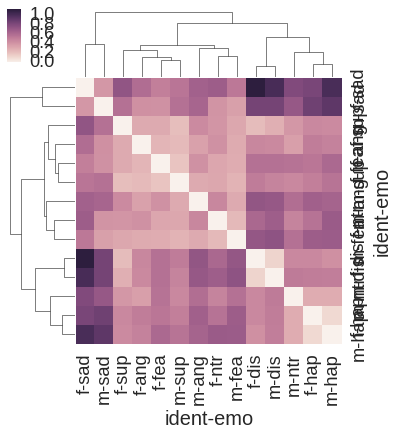

In [8]:
sns.clustermap(dissWeight,figsize=(6, 6));

### Multidimensional Scaling

Set parameters for mds

In [9]:
mds = manifold.MDS(n_components=2,
                   max_iter=3000,
                   eps=1e-9,
                   dissimilarity="precomputed",
                   n_jobs=1)

Apply parameters to the data

In [10]:
mdsPositions = mds.fit( dissWeight ).embedding_

We get positions in a 2d-space, close proximity means large similarity

Cave: This will give different values each time, as the distances do not  fully determine the position (so each time the space is generated, it is rotated in a different way!)

In [11]:
print mdsPositions

[[ 0.05828196  0.06669973]
 [ 0.01711763 -0.45909476]
 [-0.15731716  0.08263661]
 [ 0.3548822  -0.23839795]
 [-0.31073891  0.0184738 ]
 [-0.14997452  0.62931325]
 [-0.05205455 -0.16825512]
 [ 0.18072068  0.30324518]
 [-0.07182826 -0.46293225]
 [-0.11825031  0.24308039]
 [ 0.37666203 -0.30043075]
 [ 0.32151048 -0.07630237]
 [-0.40063541  0.33184758]
 [-0.04837586  0.03011667]]


put into DataFrame

In [12]:
mdsDf = pd.DataFrame(mdsPositions,index=dissWeight.index)
mdsDf

0         1
ident emo                    
f     ang  0.058282  0.066700
      dis  0.017118 -0.459095
      fea -0.157317  0.082637
      hap  0.354882 -0.238398
      ntr -0.310739  0.018474
      sad -0.149975  0.629313
      sup -0.052055 -0.168255
m     ang  0.180721  0.303245
      dis -0.071828 -0.462932
      fea -0.118250  0.243080
      hap  0.376662 -0.300431
      ntr  0.321510 -0.076302
      sad -0.400635  0.331848
      sup -0.048376  0.030117

### Make a function to wrap this all together

In [13]:
def makeRsaDf(weightDf,mds=mds):
    # average over all participants
    weightAvgDf = weightDf.groupby(level=[1,2]).mean()
    # make dissimiarity matrix
    dissWeight = 1 - weightAvgDf.T.corr().fillna(0)
    # do the MDS
    mdsPositions = mds.fit( dissWeight ).embedding_
    # put into dataframe, annotate
    mdsDf = pd.DataFrame(mdsPositions,index=dissWeight.index)
    
    return mdsDf

In [14]:
mdsDf = makeRsaDf(weightDf)
mdsDf

0         1
ident emo                    
f     ang  0.013398 -0.004736
      dis -0.244885  0.387968
      fea  0.136745 -0.073895
      hap -0.428075  0.029082
      ntr -0.000683 -0.270555
      sad  0.517737 -0.394046
      sup -0.029778  0.179263
m     ang  0.349809  0.161522
      dis -0.156011  0.443311
      fea  0.262132 -0.108953
      hap -0.460378  0.114683
      ntr -0.318869 -0.093711
      sad  0.230670 -0.448101
      sup  0.128189  0.078168

### Annotated Scatterplot

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib._png import read_png

In [16]:
def makeScatter(mdsDf,ax,identDict=identDict,emoDict=emoDict):

    # make the scatterplot
    for ident,emo in mdsDf.index:
        thisDf = mdsDf.ix[ident].ix[emo]
        myAx = ax.errorbar(thisDf[0], thisDf[1],
                           c=stackColors[emoReverse[emo]],
                           marker='ov'[identReverse[ident]],
                           markersize=35,
                           markeredgewidth=.5,
                           #label=ident+' '+emo
                           );

    sns.despine()   
    ax.set_ylim(-0.5,0.4);ax.set_xlim(-0.6,0.8)
    #ax.legend(loc='upper right')
    ax.set_yticks([]); ax.set_xticks([])
    ax.set_ylabel(''); ax.set_xlabel('')
    
    return myAx

In [17]:
def makePicture(mdsDf,ax,myZoom=0.15):
    mdsDf.plot(0,1, kind='scatter', s=50,ax=ax)
    for label, x, y in zip(mdsDf.index, mdsDf[0], mdsDf[1]):
        imagebox = OffsetImage(read_png(picList[identReverse[label[0]] ][emoReverse[label[1]] ]), zoom=myZoom)
        ab = AnnotationBbox(imagebox, [x,y],pad=0)
        ax.add_artist(ab)
    ax.set_ylim(-0.5,0.4);ax.set_xlim(-0.6,0.8)
    ax.set_yticks([]); ax.set_xticks([])
    ax.set_ylabel(''); ax.set_xlabel('')
    return ax;

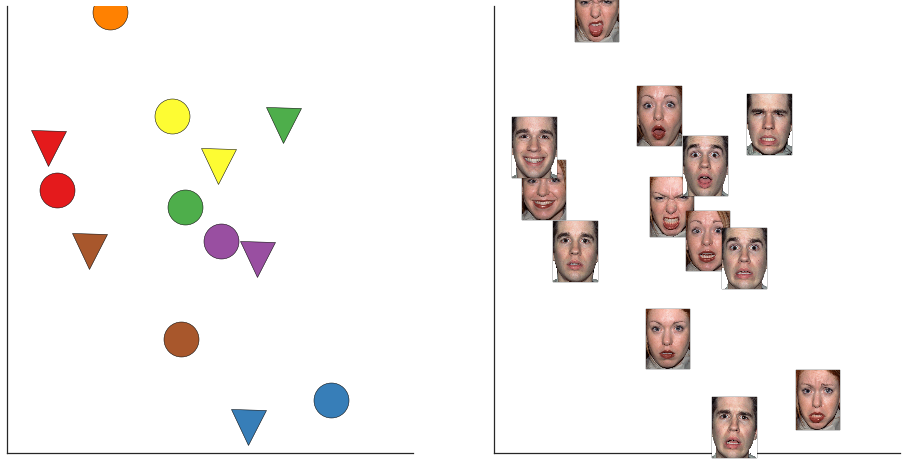

In [18]:
f, ( ax1, ax2 ) = plt.subplots( 1,2,figsize=(16,8) );
makeScatter(mdsDf,ax1);
makePicture(mdsDf,ax2,myZoom=0.15);
sns.despine()
#plt.savefig('../figures/mdsBehavior.png',dpi=300)

## RSA with raw pixel values

This is done with greyscale images for simplicity...

In [19]:
def makePixel(picList=picList,identDict=identDict,emoDict=emoDict):
    bigDf = pd.DataFrame()
    for i,ident in enumerate(picList):
        for e,express in enumerate(ident):
            # open image
            thisImg = Image.open(express)
            # convert to greyscale
            thisBw = thisImg.convert('L')
            # convert to array
            thisArray = np.array(thisBw)
            # convert to 1d list
            thisList = list(chain(*thisArray))
            # standardize
            floatList = map(float,thisList)
            thisStd = StandardScaler(with_std=False).fit_transform(floatList)

            # convert data frame
            thisDf = pd.DataFrame(thisStd).T
            idx = pd.MultiIndex.from_tuples( [(identDict[i],emoDict[e])] )
            thisDf.index = idx

            # append to big one
            try:
                bigDf = pd.concat([bigDf,thisDf])
            except:
                bigDf = thisDf
                
    bigDf = bigDf.sortlevel()
    
    return bigDf

In [20]:
bigPixelDf = makePixel()

/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [21]:
bigPixelDf.head()

0          1          2          3          4          5       \
f ang -67.147280 -66.147280 -71.147280 -74.147280 -76.147280 -76.147280   
  dis -80.495422 -78.495422 -80.495422 -82.495422 -76.495422 -70.495422   
  fea -81.921512 -83.921512 -84.921512 -82.921512 -75.921512 -78.921512   
  hap -87.162660 -83.162660 -77.162660 -82.162660 -80.162660 -81.162660   
  ntr -81.018184 -82.018184 -81.018184 -79.018184 -85.018184 -88.018184   

          6          7          8          9          10         11      \
f ang -71.147280 -72.147280 -73.147280 -71.147280 -67.147280 -69.147280   
  dis -73.495422 -79.495422 -79.495422 -81.495422 -83.495422 -82.495422   
  fea -85.921512 -84.921512 -84.921512 -84.921512 -83.921512 -84.921512   
  hap -72.162660 -78.162660 -87.162660 -87.162660 -78.162660 -72.162660   
  ntr -79.018184 -77.018184 -83.018184 -82.018184 -78.018184 -79.018184   

          12         13         14          15         16         17      \
f ang -51.147280 -48.147280 -67.147280  -73.147280 -68.147280 -69.147280   
  dis -77.495422 -75.495422 -74.495422  -78.495422 -88.495422 -91.495422   
  fea -81.921512 -70.921512 -74.921512  -84.921512 -84.921512 -85.921512   
  hap -76.162660 -90.162660 -88.162660  -84.162660 -91.162660 -90.162660   
  ntr -77.018184 -78.018184 -92.018184 -102.018184 -95.018184 -82.018184   

          18         19         20         21         22         23      \
f ang -63.147280 -59.147280 -50.147280 -26.147280 -23.147280 -34.147280   
  dis -84.495422 -75.495422 -64.495422 -58.495422 -58.495422 -52.495422   
  fea -83.921512 -72.921512 -71.921512 -87.921512 -85.921512 -83.921512   
  hap -88.162660 -91.162660 -93.162660 -81.162660 -56.162660 -50.162660   
  ntr -72.018184 -68.018184 -64.018184 -64.018184 -69.018184 -75.018184   

          24         25         26         27         28         29      \
f ang -37.147280 -39.147280 -41.147280 -36.147280 -22.147280 -23.147280   
  dis -53.495422 -55.495422 -54.495422 -49.495422 -47.495422 -47.495422   
  fea -71.921512 -57.921512 -57.921512 -62.921512 -51.921512 -41.921512   
  hap -58.162660 -63.162660 -69.162660 -70.162660 -73.162660 -72.162660   
  ntr -72.018184 -63.018184 -54.018184 -49.018184 -44.018184 -38.018184   

          30         31         32         33         34         35      \
f ang -27.147280 -17.147280  -4.147280  -2.147280  -5.147280  -7.147280   
  dis -42.495422 -38.495422 -31.495422 -24.495422 -21.495422 -20.495422   
  fea -47.921512 -54.921512 -58.921512 -55.921512 -48.921512 -35.921512   
  hap -66.162660 -58.162660 -56.162660 -64.162660 -65.162660 -39.162660   
  ntr -38.018184 -45.018184 -58.018184 -66.018184 -63.018184 -51.018184   

          36         37         38         39         40         41      \
f ang  -7.147280  -9.147280 -10.147280  -0.147280  12.852720  15.852720   
  dis -19.495422 -16.495422 -19.495422 -25.495422 -28.495422 -27.495422   
  fea -18.921512 -25.921512 -30.921512 -23.921512 -29.921512 -42.921512   
  hap -21.162660 -33.162660 -63.162660 -64.162660 -54.162660 -53.162660   
  ntr -35.018184 -25.018184 -29.018184 -36.018184 -30.018184 -20.018184   

          42         43         44         45         46         47      \
f ang  13.852720   5.852720  -3.147280   1.852720   2.852720  -0.147280   
  dis -29.495422 -29.495422 -23.495422 -14.495422 -13.495422 -16.495422   
  fea -50.921512 -50.921512 -44.921512 -47.921512 -37.921512 -23.921512   
  hap -46.162660 -34.162660 -24.162660 -22.162660 -23.162660 -20.162660   
  ntr -13.018184  -7.018184   0.981816   9.981816  17.981816  26.981816   

          48         49       ...    121750  121751  121752  121753  121754  \
f ang   6.852720  10.852720   ...       NaN     NaN     NaN     NaN     NaN   
  dis -12.495422  -2.495422   ...       NaN     NaN     NaN     NaN     NaN   
  fea -10.921512  -1.921512   ...       NaN     NaN     NaN     NaN     NaN   
  hap -11.162660  -9.162660   ...       NaN     NaN     NaN     NaN     NaN   
 

In [22]:
dissImg = 1 - bigPixelDf.T.corr()

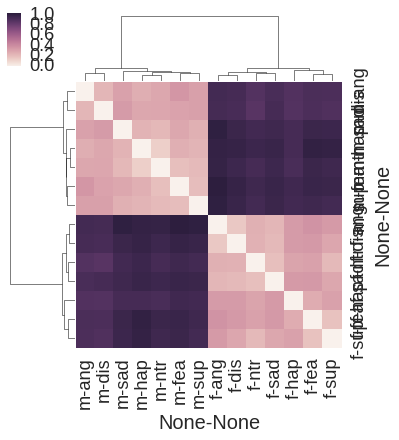

In [23]:
sns.clustermap(dissImg,figsize=(6, 6));

In [24]:
def makeRsaImgDf(weightDf,mds=mds):
    # make dissimiarity matrix
    dissWeight = 1 - weightDf.T.corr().fillna(0)
    # do the MDS
    mdsPositions = mds.fit( dissWeight ).embedding_
    # put into dataframe, annotate
    mdsDf = pd.DataFrame(mdsPositions,index=dissWeight.index)
    
    return mdsDf

In [25]:
mdsImgDf = makeRsaImgDf(bigPixelDf)

In [26]:
mdsImgDf.head()

0         1
f ang  0.485732  0.280552
  dis  0.444174  0.233374
  fea  0.518007 -0.163537
  hap  0.415278 -0.207240
  ntr  0.438535  0.066314

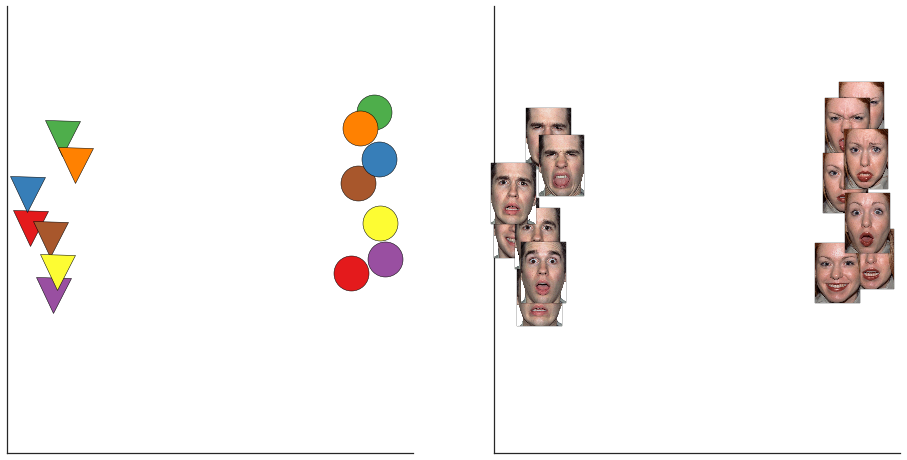

In [27]:
def makeScatter(mdsDf,ax,identDict=identDict,emoDict=emoDict):

    # make the scatterplot
    for ident,emo in mdsDf.index:
        thisDf = mdsDf.ix[ident].ix[emo]
        myAx = ax.errorbar(thisDf[0], thisDf[1],
                           c=stackColors[emoReverse[emo]],
                           marker='ov'[identReverse[ident]],
                           markersize=35,
                           markeredgewidth=.5,
                           #label=ident+' '+emo
                           );

    sns.despine()   
    ax.set_ylim(-0.75,0.6);ax.set_xlim(-0.6,0.6)
    #ax.legend(loc='upper right')
    ax.set_yticks([]); ax.set_xticks([])
    ax.set_ylabel(''); ax.set_xlabel('')
    
    return myAx

def makePicture(mdsDf,ax,myZoom=0.15):
    mdsDf.plot(0,1, kind='scatter', s=50,ax=ax)
    for label, x, y in zip(mdsDf.index, mdsDf[0], mdsDf[1]):
        imagebox = OffsetImage(read_png(picList[identReverse[label[0]] ][emoReverse[label[1]] ]), zoom=myZoom)
        ab = AnnotationBbox(imagebox, [x,y],pad=0)
        ax.add_artist(ab)
    ax.set_ylim(-0.75,0.6);ax.set_xlim(-0.6,0.6)
    ax.set_yticks([]); ax.set_xticks([])
    ax.set_ylabel(''); ax.set_xlabel('')
    return ax;



f, ( ax1, ax2 ) = plt.subplots( 1,2,figsize=(16,8) );
makeScatter(mdsImgDf,ax1);
makePicture(mdsImgDf,ax2,myZoom=.15);
sns.despine()

#plt.savefig('../figures/mdsPixel.png',dpi=300)

### make progression

In [28]:
from procrustesTransformation import procrustes # http://stackoverflow.com/a/18927641; Alistair Muldal

In [29]:
import time

In [30]:
def makeProcrustesDf(weightDf):

    # first we make a RSA/rsa with the averaged data, this is
    # the template to which each participant's individual data is
    # rotated to
    templateDf = makeRsaDf(weightDf)
    
    # now do an RSA for each participant
    myIndex = weightDf.index.levels[0]
    for i,p in enumerate(myIndex) :
        time.sleep(0.01) # prevent crashing...
        thisSelection = weightDf.ix[myIndex[:i+1]]

        thisDf = makeRsaDf(thisSelection.fillna(0))
        
        # rotate to template
        d, Z, tform = procrustes(np.array(templateDf),np.array(thisDf),scaling=False)
        rotatedDf = pd.DataFrame(Z,index=thisDf.index)
        
        # make figure
        f, ( ax1 ) = plt.subplots( 1,1,figsize=(8,8) );
        
        thisSelection = rotatedDf.ix[ rotatedDf.index.levels[0][:i+1] ]
        
        #makeScatter(rotatedDf,ax1);
        makePicture(rotatedDf,ax1);
        
        sns.despine(left=True,bottom=True)
                
        f.suptitle('n='+str(i+1),fontsize=30);
        f.savefig('../moviePics/mdsPlot'+('00'+str(i+1))[-3:]+'.png');
        
        plt.close('all')

In [31]:
makeProcrustesDf(weightDf)

In [32]:
mdsPics = getFile('../moviePics/','mdsHybrid*.png')